#### Fraud Test

#### Import the extra packages so it is ready to use if necessary

#### Import Packages

In [4]:
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#from pylab import *
import seaborn as sns
#%matplotlib inline
#import  statsmodels.api as sm
#import statsmodels.stats.api as sms
#from scipy.stats import boxcox

#### Import Data

In [5]:
fraudTest = pd.read_csv('C:/Users/victu/Documents/Fraud_archive/fraudTest.csv')

In [6]:
fraudTest.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


#### Concat Last + First Name = FullName minimize colums

In [7]:
fraudTest['FullName'] = fraudTest["last"] + " " + fraudTest["first"].map(str)

#### Was interested in all the names of the victims

In [8]:
fraudTest['FullName'].head()

0       Elliott Jeff
1    Williams Joanne
2       Lopez Ashley
3     Williams Brian
4      Massey Nathan
Name: FullName, dtype: object

#### Idea that gender should be connected to the FullName, view information

In [10]:
fraudTest.gender.value_counts()

F    304886
M    250833
Name: gender, dtype: int64

#### results of the histogram females experience fraud more

<AxesSubplot:>

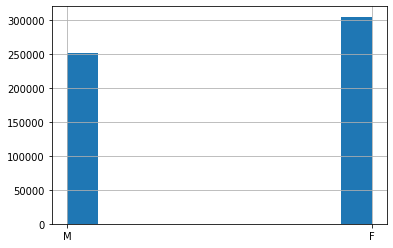

In [11]:
fraudTest.gender.hist()

#### Also thought maybe generation information may add interesting results on fraud activity

In [12]:
fraudTest.dob.value_counts()

3/23/1977     2408
9/15/1988     1951
8/29/1981     1935
9/22/1997     1474
7/5/1997      1466
              ... 
12/23/1936       9
11/8/1969        9
5/30/1944        8
5/9/1932         7
8/2/1998         6
Name: dob, Length: 910, dtype: int64

In [ ]:
#### Which states are showing more fraud activity? And ones that show less?

In [13]:
fraudTest.state.value_counts()

TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: state, dtype: int64

#### The type of jobs may have some interesting results.

In [14]:
fraudTest.job.value_counts()

Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: job, Length: 478, dtype: int64

#### Type of service did fraud happening more frequently?

In [25]:
fraudTest.category.value_counts()

gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64

#### Amount of money that was taken or stolen from merchant?

In [26]:
fraudTest.amt.value_counts()

1.10       239
1.14       237
1.08       229
1.65       227
1.03       227
          ... 
279.11       1
708.96       1
233.43       1
399.94       1
1164.37      1
Name: amt, Length: 37256, dtype: int64

#### Identify the types of merchants?

In [30]:
fraudTest.merchant.value_counts()

fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: merchant, Length: 693, dtype: int64

In [16]:
#### City population and the number of fraud activity?

In [31]:
fraudTest.city_pop.value_counts()

606        2553
1312922    2222
1595797    2182
241        2045
1766       1982
           ... 
14462        10
837792        9
20226         9
6263          8
1071          6
Name: city_pop, Length: 835, dtype: int64